### Feature Selection via Correlation Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_EDA_data = pd.read_csv(r"EDA_dataframe.csv")
df_EDA_data.head()

,customer_id,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,country,state,...,total_refunds,total_extra_data_charges,total_long_dist_charges,total_revenue,satisf_score,churn,churn_score,churn_cat,churn_reason,tenure_in_months_binned
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,0.0,20,0.00,59.65,3,1,91,Competitor,Competitor offered more data,1-3
1,4737-AQCPU,Male,39,No,No,Yes,No,0,United States,California,...,0.0,0,3063.60,8080.25,3,0,42,Not Churned,None,36+
2,5043-TRZWM,Female,32,No,No,No,No,0,United States,California,...,0.0,0,7.11,82.66,5,0,34,Not Churned,None,1-3
3,8165-CBKXO,Male,35,No,No,Yes,Yes,3,United States,California,...,0.0,0,0.00,3708.40,3,0,46,Not Churned,None,36+
4,9979-RGMZT,Female,20,Yes,No,No,No,0,United States,California,...,0.0,0,255.43,888.88,3,0,38,Not Churned,None,7-9


In [3]:
df_EDA_data.columns

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'number_of_dependents', 'country', 'state', 'city',
       'zip_code', 'latitude', 'longitude', 'population', 'quarter',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_dist_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_GB_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_dist_charges', 'total_revenue',
       'satisf_score', 'churn', 'churn_score', 'churn_cat', 'churn_reason',
       'tenure_in_months_binned'],
      dtype='object')

In [4]:
df_correlation = df_EDA_data.drop(['customer_id', 'population', 'longitude', 'latitude', 'quarter', 
                                  'country', 'state', 'zip_code', 'churn_score', 'churn_cat', 'churn_reason', 
                                  'tenure_in_months_binned', 'number_of_dependents', 'number_of_referrals'], axis = 1)

In [5]:
df_correlation.columns

Index(['gender', 'age', 'under_30', 'senior_citizen', 'married', 'dependents',
       'city', 'referred_a_friend', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_dist_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_GB_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_dist_charges', 'total_revenue',
       'satisf_score', 'churn'],
      dtype='object')

In [6]:
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         7043 non-null   object 
 1   age                            7043 non-null   int64  
 2   under_30                       7043 non-null   object 
 3   senior_citizen                 7043 non-null   object 
 4   married                        7043 non-null   object 
 5   dependents                     7043 non-null   object 
 6   city                           7043 non-null   object 
 7   referred_a_friend              7043 non-null   object 
 8   tenure_in_months               7043 non-null   int64  
 9   offer                          7043 non-null   object 
 10  phone_service                  7043 non-null   object 
 11  avg_monthly_long_dist_charges  7043 non-null   float64
 12  multiple_lines                 7043 non-null   o

In [7]:
df_correlation['churn'] = df_correlation['churn'].astype('category')

In [8]:
# Gather categorical columns into a list
category_cols = df_correlation.select_dtypes(include='object').columns.tolist()
category_cols

['gender',
 'under_30',
 'senior_citizen',
 'married',
 'dependents',
 'city',
 'referred_a_friend',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method']

In [9]:
# Convert all categorical columns to dtye 'category'

for i in category_cols:
    df_correlation[i] = df_correlation[i].astype('category')

In [10]:
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   gender                         7043 non-null   category
 1   age                            7043 non-null   int64   
 2   under_30                       7043 non-null   category
 3   senior_citizen                 7043 non-null   category
 4   married                        7043 non-null   category
 5   dependents                     7043 non-null   category
 6   city                           7043 non-null   category
 7   referred_a_friend              7043 non-null   category
 8   tenure_in_months               7043 non-null   int64   
 9   offer                          7043 non-null   category
 10  phone_service                  7043 non-null   category
 11  avg_monthly_long_dist_charges  7043 non-null   float64 
 12  multiple_lines                 704

In [11]:
# 'contract', though a categorical variable, is best represented as an ordinal variable
category_cols.remove('contract')

In [12]:
category_cols

['gender',
 'under_30',
 'senior_citizen',
 'married',
 'dependents',
 'city',
 'referred_a_friend',
 'offer',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'paperless_billing',
 'payment_method']

In [13]:
# Gather continuous columns into a list
continuous_cols = df_correlation.select_dtypes(include=['int64', 'float64']).columns.tolist()
continuous_cols

['age',
 'tenure_in_months',
 'avg_monthly_long_dist_charges',
 'avg_monthly_GB_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_dist_charges',
 'total_revenue',
 'satisf_score']

In [14]:
# encoding 'contract' variable as an ordinal variable
contract_mapping = {
    'Month-to-Month': 1,
    'One Year': 2,
    'Two Year': 3
}

df_correlation['contract_encoded'] = df_correlation['contract'].replace(contract_mapping)

### Correlation Analysis

In [15]:
from scipy.stats import pointbiserialr, spearmanr
from sklearn.metrics import matthews_corrcoef
from scipy.stats import chi2_contingency



# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


correlations = []

# Point-Biserial Correlation for continuous variables
for i in continuous_cols:
    corr, _ = pointbiserialr(df_correlation[i], df_correlation['churn'])
    correlations.append(('churn', i, 'Point-Biserial', corr))

# Spearman's Rank Correlation for ordinal variables
corr, _ = spearmanr(df_correlation['contract_encoded'], df_correlation['churn'])
correlations.append(('churn', 'contract', 'Spearman', corr))

# Cramér's V for categorical variables
for i in category_cols:
    cv = cramers_v(df_correlation[i], df_correlation['churn'])
    correlations.append(('churn', i, 'Cramér\'s V', cv))


    
    
correlation_df = pd.DataFrame(correlations, columns=['Dependent Variable', 'Independent Variable', 
                                                     'Correlation Type', 'Correlation Score'])

print(correlation_df)

   Dependent Variable           Independent Variable Correlation Type  \
0               churn                            age   Point-Biserial   
1               churn               tenure_in_months   Point-Biserial   
2               churn  avg_monthly_long_dist_charges   Point-Biserial   
3               churn        avg_monthly_GB_download   Point-Biserial   
4               churn                 monthly_charge   Point-Biserial   
5               churn                  total_charges   Point-Biserial   
6               churn                  total_refunds   Point-Biserial   
7               churn       total_extra_data_charges   Point-Biserial   
8               churn        total_long_dist_charges   Point-Biserial   
9               churn                  total_revenue   Point-Biserial   
10              churn                   satisf_score   Point-Biserial   
11              churn                       contract         Spearman   
12              churn                         gende

In [16]:
correlation_df

,Dependent Variable,Independent Variable,Correlation Type,Correlation Score
0,churn,age,Point-Biserial,0.115760
1,churn,tenure_in_months,Point-Biserial,-0.352861
2,churn,avg_monthly_long_dist_charges,Point-Biserial,0.008120
3,churn,avg_monthly_GB_download,Point-Biserial,0.048868
4,churn,monthly_charge,Point-Biserial,0.193356
5,churn,total_charges,Point-Biserial,-0.198546
6,churn,total_refunds,Point-Biserial,-0.033709
7,churn,total_extra_data_charges,Point-Biserial,0.007139
8,churn,total_long_dist_charges,Point-Biserial,-0.223756
9,churn,total_revenue,Point-Biserial,-0.223003


In [17]:
# we will be dropping some columns from our dataset due to the low correlation they have with the target variable 'churn'

df_model = df_correlation.drop(['avg_monthly_long_dist_charges', 'avg_monthly_GB_download',
                                'total_refunds', 'total_extra_data_charges', 'gender', 'under_30', 
                                'phone_service', 'multiple_lines', 'online_backup', 'device_protection_plan', 
                                'streaming_tv', 'streaming_movies', 'streaming_music', 'referred_a_friend', 'age', 'contract'], axis = 1)

In [18]:
df_model.head()

,senior_citizen,married,dependents,city,tenure_in_months,offer,internet_service,internet_type,online_security,premium_tech_support,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_long_dist_charges,total_revenue,satisf_score,churn,contract_encoded
0,Yes,No,No,Los Angeles,1,None,Yes,DSL,No,No,No,Yes,Bank Withdrawal,39.65,39.65,0.00,59.65,3,1,1
1,No,Yes,No,Los Angeles,72,None,Yes,DSL,Yes,Yes,Yes,No,Credit Card,72.10,5016.65,3063.60,8080.25,3,0,3
2,No,No,No,Los Angeles,1,None,Yes,Fiber Optic,No,No,Yes,No,Bank Withdrawal,75.55,75.55,7.11,82.66,5,0,1
3,No,Yes,Yes,Los Angeles,66,None,Yes,Cable,No,No,Yes,Yes,Credit Card,56.75,3708.40,0.00,3708.40,3,0,3
4,No,No,No,Los Angeles,7,Offer E,Yes,Fiber Optic,No,No,Yes,Yes,Credit Card,94.05,633.45,255.43,888.88,3,0,2


## Encoding Features

**Label Encoding Binary Categorical Columns**

In [19]:
binary_cat_features = df_model.select_dtypes(include='category').columns.tolist()
binary_cat_features

['senior_citizen',
 'married',
 'dependents',
 'city',
 'offer',
 'internet_service',
 'internet_type',
 'online_security',
 'premium_tech_support',
 'unlimited_data',
 'paperless_billing',
 'payment_method',
 'churn',
 'contract_encoded']

In [20]:
features_to_remove = ['city', 'offer', 'contract_encoded', 'payment_method', 'churn', 'internet_type']

binary_cat_features = [x for x in binary_cat_features if x not in features_to_remove]

binary_cat_features

['senior_citizen',
 'married',
 'dependents',
 'internet_service',
 'online_security',
 'premium_tech_support',
 'unlimited_data',
 'paperless_billing']

In [21]:
mapping = {
    'No': 0,
    'Yes': 1
}

for i in binary_cat_features:
    df_model[i + '_encoded'] = df_model[i].replace(mapping)
    df_model.drop([i], axis = 1, inplace = True)

In [22]:
df_model.head()

,city,tenure_in_months,offer,internet_type,payment_method,monthly_charge,total_charges,total_long_dist_charges,total_revenue,satisf_score,churn,contract_encoded,senior_citizen_encoded,married_encoded,dependents_encoded,internet_service_encoded,online_security_encoded,premium_tech_support_encoded,unlimited_data_encoded,paperless_billing_encoded
0,Los Angeles,1,None,DSL,Bank Withdrawal,39.65,39.65,0.00,59.65,3,1,1,1,0,0,1,0,0,0,1
1,Los Angeles,72,None,DSL,Credit Card,72.10,5016.65,3063.60,8080.25,3,0,3,0,1,0,1,1,1,1,0
2,Los Angeles,1,None,Fiber Optic,Bank Withdrawal,75.55,75.55,7.11,82.66,5,0,1,0,0,0,1,0,0,1,0
3,Los Angeles,66,None,Cable,Credit Card,56.75,3708.40,0.00,3708.40,3,0,3,0,1,1,1,0,0,1,1
4,Los Angeles,7,Offer E,Fiber Optic,Credit Card,94.05,633.45,255.43,888.88,3,0,2,0,0,0,1,0,0,1,1


## One Hot Encoding Categorical Variables With More Than Two Categories

In [23]:
cols_to_encode = ['offer', 'payment_method', 'internet_type']

df_model = pd.get_dummies(df_model, columns=cols_to_encode, drop_first=True)

In [24]:
pd.set_option('display.max_columns', None)
df_model.head()

,city,tenure_in_months,monthly_charge,total_charges,total_long_dist_charges,total_revenue,satisf_score,churn,contract_encoded,senior_citizen_encoded,married_encoded,dependents_encoded,internet_service_encoded,online_security_encoded,premium_tech_support_encoded,unlimited_data_encoded,paperless_billing_encoded,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,payment_method_Credit Card,payment_method_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None
0,Los Angeles,1,39.65,39.65,0.00,59.65,3,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,Los Angeles,72,72.10,5016.65,3063.60,8080.25,3,0,3,0,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0
2,Los Angeles,1,75.55,75.55,7.11,82.66,5,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,Los Angeles,66,56.75,3708.40,0.00,3708.40,3,0,3,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4,Los Angeles,7,94.05,633.45,255.43,888.88,3,0,2,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0


## Target Encoding Categorical Variable(s) With High Cardinality

In [25]:
df_correlation.city.nunique()

1106

In [26]:
df_model['churn'] = pd.to_numeric(df_model['churn'])

In [27]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   city                          7043 non-null   category
 1   tenure_in_months              7043 non-null   int64   
 2   monthly_charge                7043 non-null   float64 
 3   total_charges                 7043 non-null   float64 
 4   total_long_dist_charges       7043 non-null   float64 
 5   total_revenue                 7043 non-null   float64 
 6   satisf_score                  7043 non-null   int64   
 7   churn                         7043 non-null   int64   
 8   contract_encoded              7043 non-null   category
 9   senior_citizen_encoded        7043 non-null   category
 10  married_encoded               7043 non-null   category
 11  dependents_encoded            7043 non-null   category
 12  internet_service_encoded      7043 non-null   ca

In [28]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing 
X = df_model.drop('churn', axis=1)
y = df_model['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Applying target encoding on the training data to avoid data leakage
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['city'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

In [30]:
X_train_encoded.head()

,city,tenure_in_months,monthly_charge,total_charges,total_long_dist_charges,total_revenue,satisf_score,contract_encoded,senior_citizen_encoded,married_encoded,dependents_encoded,internet_service_encoded,online_security_encoded,premium_tech_support_encoded,unlimited_data_encoded,paperless_billing_encoded,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,payment_method_Credit Card,payment_method_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None
2142,0.219597,65,110.35,7246.15,2874.95,10121.10,3,3,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0
1623,0.223165,65,67.05,4309.55,2566.85,6876.40,3,2,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0
6074,0.632558,38,89.10,3342.00,1143.42,4575.42,4,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1362,0.260708,66,54.65,3632.00,0.00,3585.25,5,3,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0
6754,0.219597,26,54.55,1362.85,0.00,1362.85,4,2,0,0,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0


## Modelling

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
rf_model = RandomForestClassifier(random_state=42) 

In [33]:
rf_model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = rf_model.predict(X_test_encoded)

In [49]:
rf_model.score(X_test_encoded,y_test)

0.9659332860184529

### Evaluating Model Performance

**Checking model performance in training and test data**

In [45]:
y_train_pred = rf_model.predict(X_train_encoded)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_pred = rf_model.predict(X_test_encoded)

test_accuracy = accuracy_score(y_test, y_pred)

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

Training set accuracy: 0.9884629037983671
Test set accuracy: 0.9659332860184529


The training and test accuracies are both high and relatively close which suggests that the model is generalizing well. However, the very high score for the training data accuracy suggests the model could be learnng the training data perfectly and is capturing all its nuances, including noise. We can use cross-validation to ensure that the model's performance is stable across different subsets of the training data.

In [38]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def cross_val_with_target_encoding(X, y, model, cv):
    scores = []
    for train_idx, test_idx in cv.split(X, y):
        # Splitting the data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Applying target encoding
        encoder = ce.TargetEncoder(cols=['city'])
        X_train_encoded = encoder.fit_transform(X_train, y_train)
        X_test_encoded = encoder.transform(X_test)
        
        # Train the model
        model.fit(X_train_encoded, y_train)
        
        # Evaluate the model
        score = model.score(X_test_encoded, y_test)
        scores.append(score)
        
    return scores


scores = cross_val_with_target_encoding(X, y, rf_model, cv)

print("CV Scores:", scores)
print("Mean CV Score:", np.mean(scores))

CV Scores: [0.9524485450674237, 0.9460610361958836, 0.9581263307310149, 0.9580965909090909, 0.9588068181818182]
Mean CV Score: 0.9547078642170461


The consistent and high cross-validation scores across all folds tells us the model has low variance in its performance across different subsets of the data and it indicates that the model is stable and not highly sensitive to the specific data it is trained on.  

A mean CV score of approximately 0.955 is excellent and suggests that the model should perform similarly on unseen data.

### Evaluating model performance using AUC-ROC 

In [39]:
y_probs = rf_model.predict_proba(X_test_encoded)[:, 1]

In [40]:
from sklearn.metrics import roc_auc_score


auc_roc = roc_auc_score(y_test, y_probs)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.9949224345804637


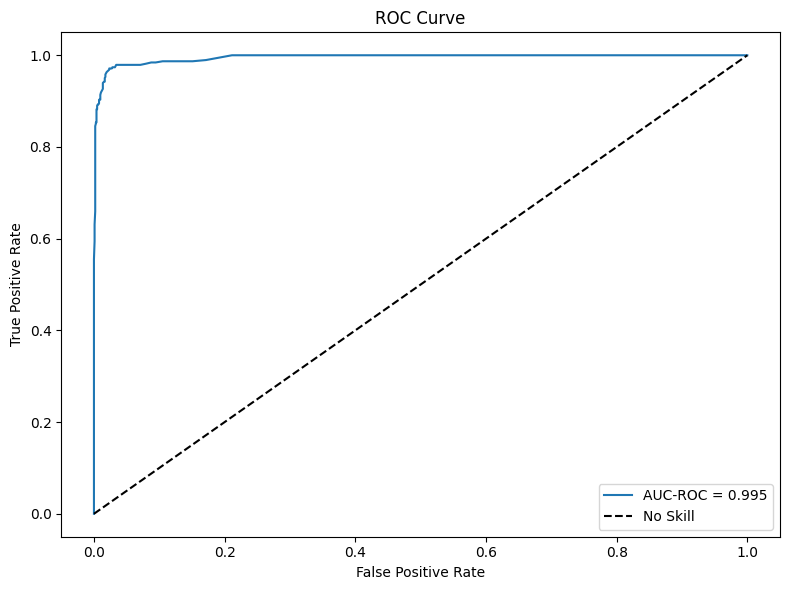

In [51]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig('ROC Curve.png', bbox_inches = 'tight')

plt.show()

The ROC (Receiver Operating Characteristic) curve appears to show an excellent model performance with an AUC (Area Under the Curve) of 0.995. An AUC of 0.995 suggests that there is a 99.5% chance that the model will be able to distinguish between a random positive and a random negative instance.

### Checking Classification Report & Confusion Matrix

We should look at ther metrics asides accuracy as our dataset is imbalanced. Other metrics such as recall, and f1-score will give us more perspective into how well the model is performing.

In [42]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1027
           1       0.94      0.86      0.90       382

    accuracy                           0.95      1409
   macro avg       0.94      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409



The high precision, recall, and f1-scores indicate that the model is classifying the 'Churn' and 'No Churn' categories effectively.

In [44]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1005,   22],
       [  52,  330]], dtype=int64)

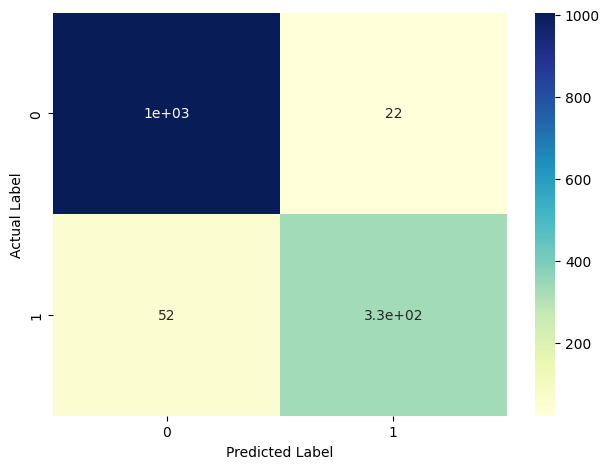

In [50]:
sns.heatmap(cnf_matrix, annot = True, cmap = 'YlGnBu')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('Confusion Matrix.png', bbox_inches = 'tight')
plt.show()

- TN: The matrix shows that over 1,000 cases where the number of actual "No Churn" cases were correctly predicted by the model as "No Churn."  
- TP: The matrix shows 330 cases where the number of actual "Churn" cases are correctly predicted as "Churn."  here, which suggests the model is reasonably effective at identifying customers who will churn.
- FP: There are 22 cases where the model incorrectly predicted "Churn" when they were actually "No Churn."  here, which is relatively low, indicating good precision.
- FN: There are 52 cases  where the model incorrectly predicted "No Churn" when they were actually "Churn." 

All these goes to show that our model is great at predicting the churn of customers for the telecom dataset.

## Pickling the Model

In [52]:
import pickle

In [53]:
filename = 'rf_model_TelecomCustChurn.sav'

In [54]:
pickle.dump(rf_model, open(filename, 'wb'))